In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.Purchased.value_counts()


0    257
1    143
Name: Purchased, dtype: int64

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df = df.drop(columns = ['User ID'],axis = 1)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [9]:
df.Gender = le.fit_transform(df.Gender)

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

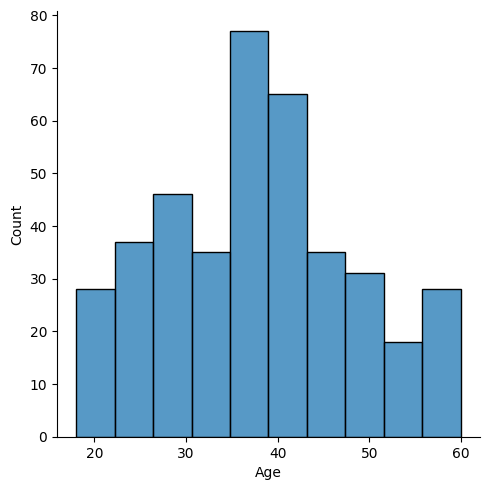

In [12]:
sns.displot(df.Age)

In [13]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


<Axes: >

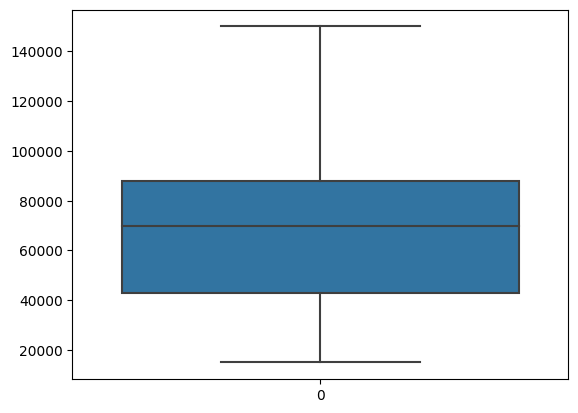

In [14]:
sns.boxplot(df.EstimatedSalary)

<Axes: >

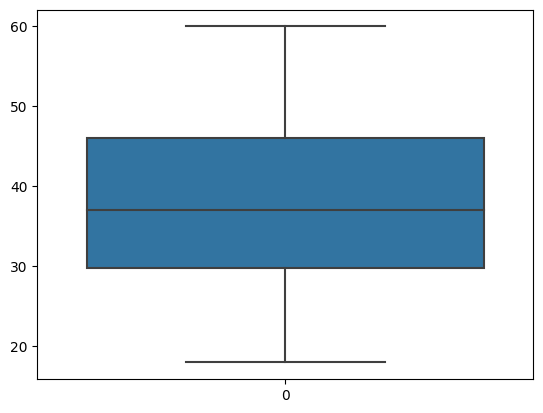

In [15]:
sns.boxplot(df.Age)

In [16]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

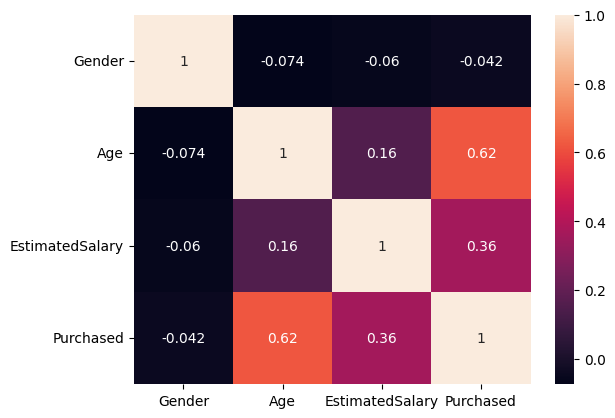

In [17]:
sns.heatmap(df.corr(),annot =True)

In [18]:
df.corr().Purchased.sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

In [19]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [20]:
## X and y split

X =df.drop(columns =['Purchased'],axis =1)

In [21]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [22]:
y =df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [24]:
 scaled_x = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
 scaled_x.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [53]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.2,random_state = 0)

In [54]:
x_train.shape

(320, 3)

In [55]:
x_test.shape

(80, 3)

In [90]:
## Model building

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [91]:
model.fit(x_train,y_train)

LogisticRegression()

In [92]:
pred = model.predict(x_test)

In [59]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [60]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [61]:
model.predict([[1,35,75000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## Evaluation for Classification model

In [84]:
## Accuracy Score

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve

In [64]:
accuracy_score(y_test,pred)

0.925

In [67]:
confusion_matrix(y_test,pred)

array([[58,  0],
       [ 6, 16]])

In [68]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,58,0
1,6,16


In [72]:
(58+16)/80 ## accuracy score

0.925

In [74]:
# classification report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [78]:
# precision
# of all positive predictions how many are really positive

# precision = TP/(TP+FP)
16/(16+0)

1.0

In [77]:
# Recall
# of all real positive cases how many are predicted positive

# Recall = TP/(FN+TP)
16/(16+6)

0.7272727272727273

In [79]:
# F1 score

# 2*precision*Recall/(Precision+Recall)

2*1*0.73/(1.73)

0.8439306358381503

In [80]:
58/(58+6)

0.90625

In [82]:
## ROC- AUC Score

probability  = model.predict_proba(x_test)[:,1]
probability

array([0.2144872 , 0.25275401, 0.27923866, 0.18905548, 0.19283512,
       0.05077814, 0.07141131, 0.61971028, 0.04489232, 0.45763683,
       0.11656137, 0.10458125, 0.2498842 , 0.39023091, 0.07753816,
       0.3782384 , 0.33667398, 0.06841339, 0.91815959, 0.12317974,
       0.18405501, 0.8529991 , 0.32802683, 0.73435186, 0.03755646,
       0.87354905, 0.17728525, 0.1753795 , 0.27483994, 0.25154865,
       0.08930984, 0.34527554, 0.78827655, 0.24277786, 0.07252234,
       0.03360677, 0.08785064, 0.15688678, 0.0996113 , 0.48076385,
       0.16428821, 0.33335936, 0.15340067, 0.11910455, 0.66423454,
       0.09922975, 0.34848964, 0.7865558 , 0.05454283, 0.70785041,
       0.92388136, 0.11649016, 0.21455017, 0.42591222, 0.88868144,
       0.35155547, 0.18309699, 0.13003618, 0.44394933, 0.03255284,
       0.08417465, 0.78880947, 0.05821796, 0.40782162, 0.02307795,
       0.89114604, 0.12344655, 0.09967335, 0.28809901, 0.44088787,
       0.5335957 , 0.28599525, 0.06358761, 0.30925421, 0.16693

In [87]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_test,probability)

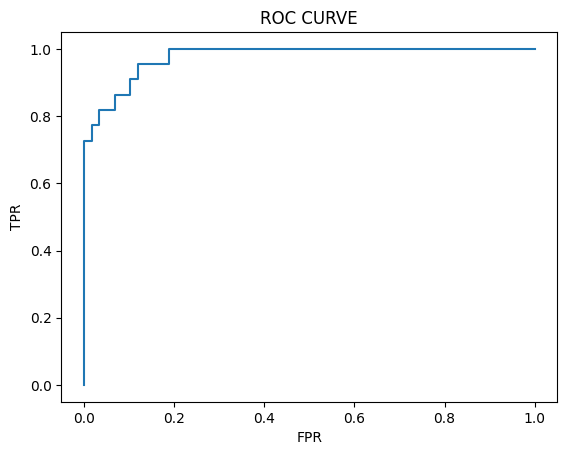

In [89]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [86]:
# AUC score
roc_auc_score(y_test,probability)

0.975705329153605